# Market Making with Alpha Signals

## Pure Jump Process

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In this case the poisson arrivals are created by simulating the entire T time and ordering those uniformly. This simulation is interpreting the Poisson process as a distribution of point counts. In this way time between arrivals have an exponential probability distribution.

117
[0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 0 1 1 0 0 1]
[-1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
 -1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1
 -1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1]


(array([47., 28., 17.,  7.,  6.,  2.,  4.,  0.,  1.,  4.]),
 array([1.34368354e-03, 2.51790198e-01, 5.02236712e-01, 7.52683226e-01,
        1.00312974e+00, 1.25357625e+00, 1.50402277e+00, 1.75446928e+00,
        2.00491580e+00, 2.25536231e+00, 2.50580882e+00]),
 <BarContainer object of 10 artists>)

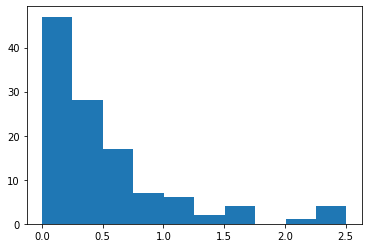

In [2]:
T=60
np.random.seed(1)
lambda_ = (1., 1.)
sigma = 1
number_of_market_orders=np.random.poisson(sum(lambda_) * T)
print(number_of_market_orders)
times = np.sort(np.random.uniform(size=number_of_market_orders)*T)
#print(times)
markers = np.random.binomial(n=1, p=lambda_[1] / sum(lambda_), size=number_of_market_orders)
jumps = np.where(markers == 0, -1, 1)
print(markers)
print(jumps)
s = sigma * np.cumsum(jumps)
plt.hist(np.diff(times))


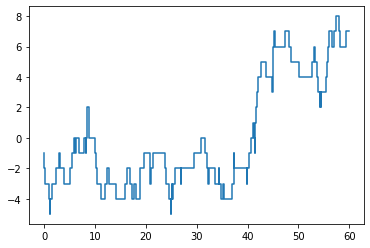

In [3]:
plt.step(times, s)

## Other way of simulating poisson arrivals

On the other hand, generating a random uniform variable for each dt will also generate a possion distribution if at each time we analyze the exponential probability distribution required. We are interpreting the poisson process as a counting process.

Thus, as for a Poisson process

$P(N_t - N_0 = n ) = \frac{(\lambda t)^n}{n!}e^{-\lambda t}$

Considering the probability of more than one arrival in dt negligible then

$P(N_t-N_{t-1}=n \neq 0)= \sum_{i=1}^{\infty} \frac{(\lambda dt)^i}{i!}e^{-\lambda dt}$

$P(N_t-N_{t-1}=n \neq 0)= 1-e^{-\lambda dt}$

which is the exponential distribution, as expected for the time of arrivales of a Poisson Process

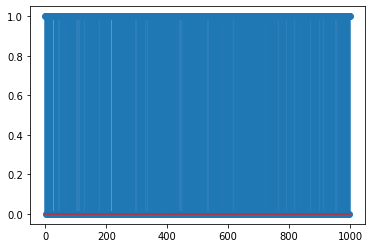

(array([381.,   0., 177.,   0.,  48.,   0.,  14.,   0.,   9.,   3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

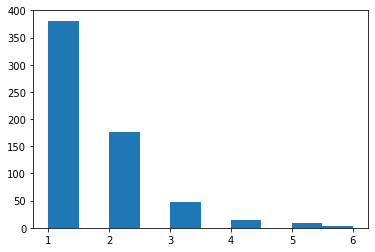

In [4]:
l = 1
n=1000
dt=1
arrivals = np.where(np.random.rand(n) < np.around((1 - np.exp(-dt * (l))), decimals=4),1,0)
plt.stem(arrivals)
plt.show()

t=np.array(range(n))
arrival_times = arrivals*t
arrival_times = arrival_times[arrival_times != 0]
arrival_times
distribution = np.diff(arrival_times)
plt.hist(distribution)

## dAlpha and dS as of Market Making with Alpha Signals

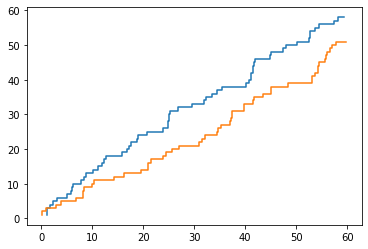

In [5]:
T=60
np.random.seed(1)
lambda_ = (1., 1.)
number_of_market_orders_buy=np.random.poisson(lambda_[0] * T)
number_of_market_orders_sell=np.random.poisson(lambda_[1] * T)
tau_plus = np.sort(np.random.uniform(size=number_of_market_orders_buy)*T)
tau_minus = np.sort(np.random.uniform(size=number_of_market_orders_sell)*T)
dMt_plus = np.ones(number_of_market_orders_buy)
dMt_minus = np.ones(number_of_market_orders_sell)
Mt_plus = dMt_plus.cumsum()
Mt_minus = dMt_minus.cumsum()
plt.step(tau_plus, Mt_plus)
plt.step(tau_minus, Mt_minus)


As in Jaimungal we can iterate in t but simulate across using an n size vector, generating n simulations at once.

Also since $d \alpha_t = -k \alpha_t dt$ then, $\alpha_t = c * e^{-k t}$

Alpha thus have a mean reverting component. 

I don't get why Jaimungal solves it using $\alpha_t = e^{-\zeta * dt} * \alpha_{t-1} $ since in the page 220 of AHFT solution is $\alpha_t = \alpha_0 e^{-k t}$

I guess since $\alpha_t = \alpha_0 e^{-k t}$, 

then

$\alpha_{t + dt} = \alpha_0 e^{-k (t+dt)}$

$\alpha_{t + dt} = \alpha_0 e^{-kt-k*dt}$

$\alpha_{t + dt} = \alpha_0 e^{-kt}e^{-k*dt}$

$\alpha_{t + dt} = \alpha_t e^{-k*dt}$

Condition as in paper:

$d\alpha_t=-k\alpha_t dt + \xi dW_t + \eta^+ (dM_t^{0+}+dM_t^+)-\eta^-(dMt_t^{0-}+dM_t^-), \alpha_0=0$


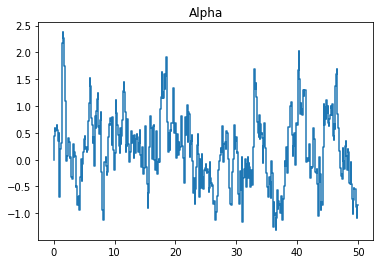

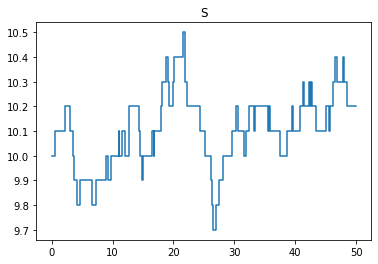

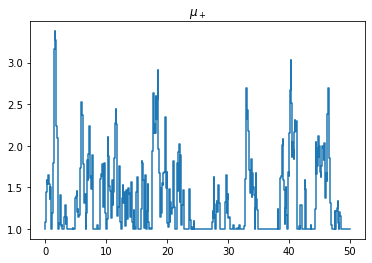

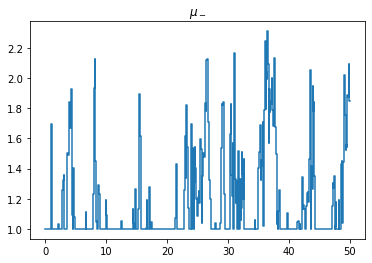

In [6]:
# In this code the Market Orders made by the Market Maker are not added

np.random.seed(1)
n = 10 # amount of simulations

# Alpha params
k = 1

eta_plus = 1
eta_minus = 1
lambda_plus = 0.1
lambda_minus = 0.1

T = 50
dt = 0.1


xi = 1
dMt_minus = 0
dMt_plus = 0

# S params
sigma = 0.1
theta = 1
s0 = 10

def generate_simulations(n, k, eta_plus, eta_minus, lambda_plus, lambda_minus, T, dt, xi, sigma, theta, s0, plot=False):
    m = int(T/dt)
    # Alpha setup
    alpha = np.full((n, m), np.nan)
    alpha[:, 0] = 0

    tau_plus_amounts = np.random.poisson(lambda_plus*T, n)
    tau_minus_amounts = np.random.poisson(lambda_minus*T, n)
    tau_plus = [np.sort(np.random.rand(tau_i) * T) for tau_i in tau_plus_amounts]
    tau_minus = [np.sort(np.random.rand(tau_i) * T) for tau_i in tau_minus_amounts]

    dMt0_plus = np.array([np.histogram(tau_i,np.linspace(0,T,m))[0] for tau_i in tau_plus])
    dMt0_minus = np.array([np.histogram(tau_i,np.linspace(0,T,m))[0] for tau_i in tau_minus])

    # S setup
    s = np.full((n, m), np.nan)
    s[:, 0] = s0

    mu_plus = np.full((n, m), np.nan)
    mu_plus[:, 0] = theta
    mu_minus = np.full((n, m), np.nan)
    mu_minus[:, 0] = theta

    dJ_plus = np.full((n, m), np.nan)
    dJ_plus[:, 0] = 0

    dJ_minus = np.full((n, m), np.nan)
    dJ_minus[:, 0] = 0

    # Simulations
    for i in range(m-1):
        # dMt_minus and dMt_plus depend on the MM
        alpha[:, i+1] = alpha[:,i] * np.exp(-k * dt) + xi * np.sqrt(dt) * (np.random.randn(n)) + eta_plus *(dMt0_plus[:,i] + dMt_plus) - eta_minus * (dMt0_minus[:,i] + dMt_minus)

        mu_plus[:, i+1] = np.where(alpha[:, i+1]>0, alpha[:, i+1],0) + theta
        mu_minus[:, i+1] = np.where(alpha[:, i+1]<0, -alpha[:, i+1],0) + theta

        dJ_plus[:, i+1] = np.where(np.random.rand(n) < (1 - np.exp(-dt * (mu_plus[:,i+1]))),1,0)
        dJ_minus[:, i+1] = np.where(np.random.rand(n) < (1 - np.exp(-dt * (mu_minus[:,i+1]))),1,0)
        
        s[:,i+1] = s[:,i] + sigma * (dJ_plus[:, i+1] - dJ_minus[:, i+1])

    if plot:
        plt_i = 0
        plt.title('Alpha')
        plt.step(np.linspace(0,T,m),alpha[plt_i])

        plt.figure()
        plt.title('S')
        plt.step(np.linspace(0,T,m),s[plt_i])
        # plt.stem(np.linspace(0,T,m),dJ_plus[plt_i]])

        plt.figure()
        plt.title('$\mu_+$')
        plt.step(np.linspace(0,T,m),mu_plus[plt_i])

        plt.figure()
        plt.title('$\mu_-$')
        plt.step(np.linspace(0,T,m),mu_minus[plt_i])
    return alpha, mu_plus, mu_minus, dJ_plus, dJ_minus, s
_ = generate_simulations(n, k, eta_plus, eta_minus, lambda_plus, lambda_minus, T, dt, xi, sigma, theta, s0, plot=True)

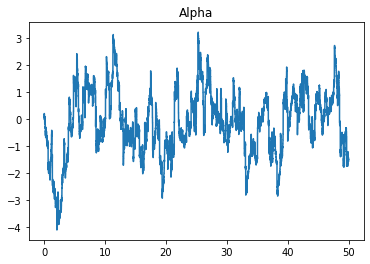

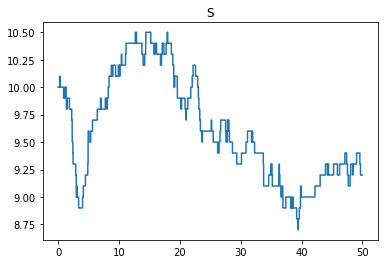

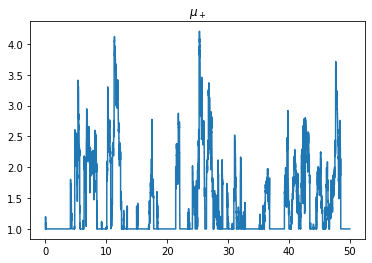

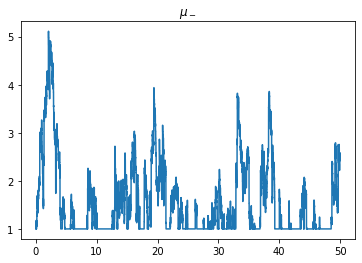

In [7]:
np.random.seed(2)
_ = generate_simulations(n=1, k=1, eta_plus=1, eta_minus=1, lambda_plus=1, lambda_minus=1, T=50, dt=0.01, xi=1, sigma=0.1, theta=1, s0=10, plot=True)

## Price Path Simulation with parameters as in MM with alpha signals paper (Figure 3 a, b)

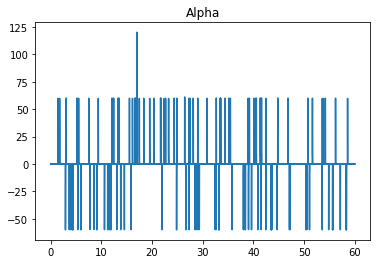

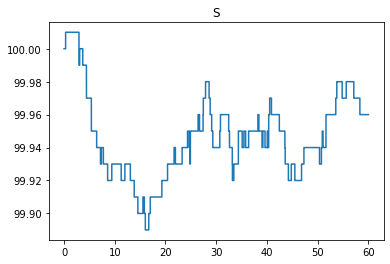

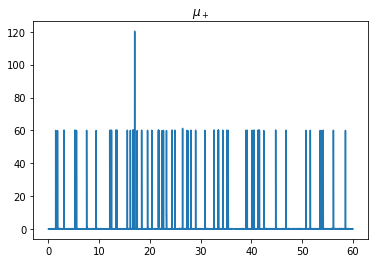

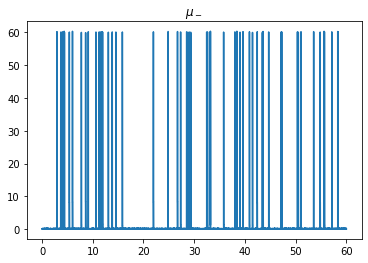

In [8]:
np.random.seed(3)
_ = generate_simulations(n=1, k=200, eta_plus=60, eta_minus=60, lambda_plus=1, lambda_minus=1, T=60, dt=0.01, xi=1, sigma=0.01, theta=0.1, s0=100, plot=True)

## H
$\Upsilon = \Delta + \epsilon$ where $\Delta$ is the market spread and $\epsilon \gt 0$ represents the exchange fee.

Problem:

...

Development of solution:

Terminal condition:

$H(T,x,S,\alpha,q)=x+q(S-sign(q)\Upsilon-\psi q)$

Solution:



$H(t,x,S,\alpha,q)=x+qS+\hat{h}(t,\alpha, q)$

with terminal condition:

$\hat{h}(T,\alpha, q)=q(-sign(q)\Upsilon-\psi q)$

$\psi$ is a constant and $\psi Q_t$ represents the extra cost of walking the LOB at the end of the session.


In [22]:
import numpy as np

q_max = 4
T = 2
A = 300

dalpha = 30.0
Delta = 0.005
epsilon = 0.005
Upsilon = Delta + epsilon
psi = 0.01
phi_ = 1e-6
eta = 60.0
sigma = 0.01
k = 200.0
xi = 1.0
lambda_plus = lambda_minus = 1.0

dt = (k * A /dalpha + lambda_plus + lambda_minus)**(-1)

q = np.arange(-q_max, q_max + 1, 1)
alpha = np.arange(-A, A + 1, dalpha)

alpha_smaller_0 = np.where(alpha < 0)[0]
alpha_greater_0 = np.where(alpha > 0)[0]
alpha_0 = np.where(alpha == 0)[0]

n_q = len(q)
n_alpha = len(alpha)
n_t = int(T / dt)

h = np.full((n_t, n_alpha, n_q), np.nan)
d_alpha_h = np.zeros(n_alpha)
dd_alpha_h = np.zeros(n_alpha)

l_plus = np.zeros((n_t, n_alpha, n_q))
l_minus = np.zeros((n_t, n_alpha, n_q))

h_eta_up = np.full((n_t, n_alpha, n_q), np.nan)
h_eta_down = np.full((n_t, n_alpha, n_q), np.nan)


def T_dt_dalpha(h, t_i, q_i, d_alpha_h, dd_alpha_h):
    h_t_1_q = h[t_i + 1, :, q_i]
    q_ = q[q_i]

    l_plus_term = get_l_plus_term(t_i, q_i, h_t_1_q)

    l_minus_term = get_l_minus_term(t_i, q_i, h_t_1_q)

    h_t_q = h_t_1_q + dt * (
        alpha * sigma * q_
        - k * alpha * d_alpha_h
        + ((xi**2) / 2) * dd_alpha_h
        - phi_ * q_**2
        + l_plus_term
        + l_minus_term
    )

    # impose second derivative vanishes along maximum and minimum values of alpha grid
    h_t_q[0] = 2 * h_t_q[1] - h_t_q[2]
    h_t_q[-1] = 2 * h_t_q[-2] - h_t_q[-3]
    return h_t_q

def get_l_minus_term(t_i, q_i, h_t_1_q):
    if q[q_i] < q_max:
        l_minus_term = lambda_minus * np.maximum(
            (Delta + h_eta_down[t_i + 1, :, q_i + 1] - h_t_1_q),
            (h_eta_down[t_i + 1, :, q_i] - h_t_1_q),
        )
    else:
        l_minus_term = h_eta_down[t_i + 1, :, q_i] - h_t_1_q
    return l_minus_term

def get_l_plus_term(t_i, q_i, h_t_1_q):
    if q[q_i] > -q_max:
        l_plus_term = lambda_plus * np.maximum(
            (Delta + h_eta_up[t_i + 1, :, q_i - 1] - h_t_1_q),
            (h_eta_up[t_i + 1, :, q_i] - h_t_1_q),
        )
    else:
        l_plus_term = h_eta_up[t_i + 1, :, q_i] - h_t_1_q
    return l_plus_term


def M_dt_dalpha(h, t_i, q_i):
    if q[q_i] < q_max and q[q_i] > -q_max:
        return np.maximum(
            (h[t_i + 1, :, q_i - 1] - Upsilon), (h[t_i + 1, :, q_i + 1] - Upsilon)
        )
    elif q[q_i] > -q_max:
        return h[t_i + 1, :, q_i - 1] - Upsilon
    elif q[q_i] < q_max:
        return h[t_i + 1, :, q_i + 1] - Upsilon
    else:
        raise ValueError(f"Imposible Case {q[q_i]}")


def S_dt_dalpha(h, t_i, q_i, d_alpha_h, dd_alpha_h):
    T_dt_dalpha_i = T_dt_dalpha(h, t_i, q_i, d_alpha_h, dd_alpha_h)
    M_dt_dalpha_i = M_dt_dalpha(h, t_i, q_i)
    return np.maximum(T_dt_dalpha_i, M_dt_dalpha_i)


def h_dt_dalpha(n, alpha, q):
    ndt = n * dt
    S_dt_dalpha(t, alpha, q, h_dt_dalpha((n + 1), alpha, q))


def calculate_d_alpha_h(h_q_t):
    d_alpha_h[alpha_smaller_0] = (
        h_q_t[alpha_smaller_0 + 1] - h_q_t[alpha_smaller_0]
    ) / dalpha
    d_alpha_h[alpha_greater_0] = (
        h_q_t[alpha_greater_0] - h_q_t[alpha_greater_0 - 1]
    ) / dalpha
    d_alpha_h[alpha_0] = (
        (h_q_t[alpha_0 + 1] - h_q_t[alpha_0]) + (h_q_t[alpha_0] - h_q_t[alpha_0 - 1])
    ) / (2 * dalpha)
    return d_alpha_h


def calculate_dd_alpha_h(h_q_t):
    dd_alpha_h[1:-1] = (h_q_t[2:] - 2 * h_q_t[1:-1] - h_q_t[:-2]) / (dalpha**2)
    return dd_alpha_h


def extrapolate_up(phi, n, diff):
    delta_phi = phi[-1] - phi[-2]
    phi_extrapolated = (
        np.ones(n) * phi[-1] + diff * delta_phi + np.arange(0, n) * delta_phi
    )
    return phi_extrapolated


def interpolate(phi, up=True):
    eta_dalpha = eta / dalpha
    eta_dalpha_floor = np.floor(eta_dalpha)
    eta_dalpha_diff = eta_dalpha - eta_dalpha_floor
    eta_move = int(eta_dalpha_floor)

    phi_eta = phi if up else np.flip(phi)

    phi_eta = np.roll(phi_eta, -eta_move)
    phi_eta[-eta_move:] = np.nan

    phi_eta_1 = np.roll(phi_eta, -1)
    phi_eta_1[-1:] = np.nan

    phi_eta += (phi_eta_1 - phi_eta) * eta_dalpha_diff
    phi_eta[-eta_move - 1 :] = extrapolate_up(
        phi if up else np.flip(phi), len(phi_eta[-eta_move - 1 :]), eta_dalpha_diff
    )

    phi_eta = phi_eta if up else np.flip(phi_eta)

    return phi_eta


def find_optimal_postings(h, t_i, q_i):
    h_eta_up[t_i + 1, :, q_i] = interpolate(h[t_i + 1, :, q_i])
    if q[q_i] > -q_max:
        h_eta_up[t_i + 1, :, q_i - 1] = interpolate(h[t_i + 1, :, q_i - 1])
        l_plus_i = np.where(
            Delta + h_eta_up[t_i + 1, :, q_i - 1] > h_eta_up[t_i + 1, :, q_i], 1, 0
        )
    else:
        l_plus_i = np.zeros(n_alpha)

    h_eta_down[t_i + 1, :, q_i] = interpolate(h[t_i + 1, :, q_i], up=False)
    if q[q_i] < q_max:
        h_eta_down[t_i + 1, :, q_i + 1] = interpolate(h[t_i + 1, :, q_i + 1], up=False)
        l_minus_i = np.where(
            Delta + h_eta_down[t_i + 1, :, q_i + 1] > h_eta_down[t_i + 1, :, q_i], 1, 0
        )
    else:
        l_minus_i = np.zeros(n_alpha)
    return l_plus_i, l_minus_i


# Terminal and boundary conditions
h[-1, :, :] = (
    np.ones((1, n_alpha)) * np.array([(q * (-np.sign(q) * Upsilon - psi * q))]).T
).T

for t_i in range(n_t - 2, -1, -1):
    for q_i in range(n_q):
        h_q_t_1 = h[t_i + 1, :, q_i]
        d_alpha_h = calculate_d_alpha_h(h_q_t_1)
        dd_alpha_h = calculate_dd_alpha_h(h_q_t_1)
        l_plus[t_i + 1, :, q_i], l_minus[t_i + 1, :, q_i] = find_optimal_postings(
            h, t_i, q_i
        )
        h[t_i, :, q_i] = S_dt_dalpha(h, t_i, q_i, d_alpha_h, dd_alpha_h)


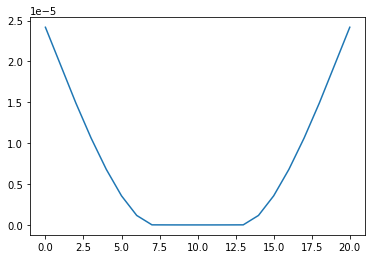

In [14]:
plt.plot(h[0,:,4])


c:\1_Projects\Tesis Quant UdeSA\optimal-market-making-main\.venv\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


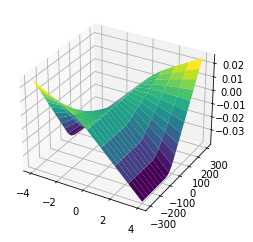

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
  
x, y = np.meshgrid(q, alpha)

fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.plot_surface(x, y, h[0,:,:], cmap='viridis')

plt.show()